In [1]:
# ************* Javier Ulloa  *********************************
# Cargar el csv para realizar el modelado de topicos y terminos
# TFM UNIR ****************************************************
# *************************************************************

import os
import pandas as pd
from gensim import corpora, models
import joblib


##Codigo Adicional agregado
import sys

# Configuración del entorno del notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from config import PDF_DIRECTORY_BOW, CSV_DIRECTORY_BOW, VOCABULARY_DIRECTORY_BOW


ruta_archivo = CSV_DIRECTORY_BOW + "\speech_evaluation.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo)

# Ruta del directorio para guardar modelos, vocabularios y corpus
# directorio_modelo_vocabulario = r'D:\Informacion\Unir\JupiterUNIR\TFM_LDA_v4\directorio_modelo_vocabulario'
directorio_modelo_vocabulario = VOCABULARY_DIRECTORY_BOW
# csv_output_path = csv_output_path+"\speech_valuation.csv"

csv_output_path = CSV_DIRECTORY_BOW + "\speech_evaluation.csv"


# Iterar sobre cada discurso único
discursos_unicos = df["Discurso"].unique()
print(discursos_unicos)

for discurso in discursos_unicos:
    try:
        nombre_discurso = discurso.replace(" ", "_")
        modelo_discurso = (
            f"{directorio_modelo_vocabulario}\\{nombre_discurso}_lda_model.model"
        )
        vocabulario_discurso = (
            f"{directorio_modelo_vocabulario}\\{nombre_discurso}_vocab.dict"
        )
        corpus_discurso = (
            f"{directorio_modelo_vocabulario}\\{nombre_discurso}_corpus.pkl"
        )

        print(f"Cargando en 10 el modelo para el discurso {discurso}")

        # Filtrar el dataframe para obtener solo las filas correspondientes al discurso actual
        oraciones_discurso = (
            df[df["Discurso"] == discurso]["TextoProcesado"].dropna().tolist()
        )

        # Verificar si hay oraciones disponibles
        if not oraciones_discurso:
            print(
                f"No hay oraciones disponibles para el discurso {discurso}. Saltando este discurso."
            )
            continue

        # Dividir cada cadena en una lista de tokens
        textos_preprocesados_discurso = [
            oracion.split() for oracion in oraciones_discurso
        ]

        # *************activar segun se necesite - stop words extra
        # Palabras a eliminar
        palabras_a_eliminar = [
            "S",
            "s",
            "si",
            "pr",
            "ón",
            "és",
            "c",
            "re",
            "po",
            "r",
            "ta",
            "pues",
            "si",
            "on",
            "na",
            "co",
            "re",
            "blo",
            "5",
            "pues",
            "e",
            "p",
            "millones",
            "soles",
            "n",
            "g",
            "69",
            "a",
            "e",
            "i",
            "o",
            "u",
            "la",
            "los",
            "de",
            "ser",
            "hoy",
            "ello",
            "país",
            "sol",
            "así",
            "debe",
            "año",
        ]

        # Filtrar palabras no deseadas, palabras de una sola letra y números
        textos_preprocesados_filtrados = [
            [
                token
                for token in oracion
                if token not in palabras_a_eliminar
                and len(token) > 1
                and token.isalpha()
            ]
            for oracion in textos_preprocesados_discurso
        ]

        print(textos_preprocesados_discurso)

        # Se crea el diccionario y el corpus
        diccionario = corpora.Dictionary(textos_preprocesados_discurso)
        corpus = [
            diccionario.doc2bow(tokens) for tokens in textos_preprocesados_discurso
        ]

        # Se crea el directorio si no existe
        if not os.path.exists(directorio_modelo_vocabulario):
            os.makedirs(directorio_modelo_vocabulario)

        ##########################
        # Entrenar el modelo LDA #
        ##########################

        # Configurar el número de temas/tópicos
        # Esquema 3 de configuracion LDA
        num_topics_tfm = 7
        lda_modelo = models.LdaModel(
            corpus,
            num_topics=num_topics_tfm,
            id2word=diccionario,
            alpha="auto",
            passes=5,
            random_state=42,
        )

        # Guardar el modelo, el diccionario y el corpus en las nuevas rutas
        lda_modelo.save(f"{modelo_discurso}")
        diccionario.save(f"{vocabulario_discurso}")
        joblib.dump(corpus, f"{corpus_discurso}")

        print(nombre_discurso)
        print(modelo_discurso)
        print(vocabulario_discurso)
        print(corpus_discurso)

    except Exception as e:
        print(f"Error al procesar el discurso {discurso}: {str(e)}")

['Argentina_2022_Alberto_Fernandez.pdf' 'Argentina_2023_Javier_Milei.pdf'
 'Bolivia_2017_Evo_Morales.pdf' 'Bolivia_2018_Evo_Morales.pdf'
 'Bolivia_2019_Evo_Morales.pdf' 'Bolivia_2020_Jeanine_Añez.pdf'
 'Bolivia_2021_Luis_Arce.pdf']
Cargando en 10 el modelo para el discurso Argentina_2022_Alberto_Fernandez.pdf
[['palabras', 'presidente', 'nación', 'alberto', 'fernández', 'acto', 'oficial', '3', 'años', 'gestión', 'gobierno', 'parque', 'colón', 'casa', 'rosada', 'buenos', 'días', 'todas'], ['verdad', 'lindo', 'día', 'encontremos', 'día', 'reflexión', 'colectiva', 'convocado', 'pedido', 'acompañen'], ['aquel', 'mes', 'mayo', 'cristina', 'propuso', 'c', 'andidato', 'verdad', 'nunca', 'pensé', 'días', 'vendrían', 'días', 'vinieron'], ['verdad', 'dos', 'soñábamos', 'poner', 'marcha', 'argentina', 'pujante', 'quedada', 'atrasada', 'perdido', 'trabajo', 'cerrado', '23', 'mil', 'empresas', 'endeudado', 'allá', 'debido'], ['creíamos', 'capaces', 'revertirlo', 'esperábamos', 'día', '99', 'pandemi

In [3]:
# pyLDA

In [3]:
pip install pyLDAvis

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.6 MB 3.2 MB/s eta 0:00:01
     --- ------------------------------------ 0.2/2.6 MB 2.9 MB/s eta 0:00:01
     ------- -------------------------------- 0.5/2.6 MB 3.9 MB/s eta 0:00:01
     ---------- ----------------------------- 0.7/2.6 MB 3.8 MB/s eta 0:00:01
     ------------ --------------------------- 0.8/2.6 MB 4.4 MB/s eta 0:00:01
     -------------------- ------------------- 1.3/2.6 MB 4.9 MB/s eta 0:00:01
     -------------------- ------------------- 1.4/2.6 MB 4.3 MB/s eta 0:00:01
     -------------------- ------------------- 1.4/2.6 MB 4.3 MB/s eta 0:00:01
     -------------------------- ------------- 1.7/2.6 MB 4.2 MB/s eta 0:00:01
     --------------------------------- ------ 2.2/2.6 MB 4.9 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 5.1 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 4.9 MB/s eta 0

In [4]:
# Visualización de los topicos em PyLDAvis
# Prueba con varios PDFs en al rura

import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis
from IPython.display import display
import time
import joblib
import warnings

##Codigo Adicional agregado
import sys

# Configuración del entorno del notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from config import PDF_DIRECTORY_BOW, CSV_DIRECTORY_BOW, VOCABULARY_DIRECTORY_BOW


# warning
warnings.filterwarnings("ignore", category=DeprecationWarning, module="joblib")

# Escribir el que necesites
# Puedes poner uno o varios PDFs
pdf_file_names = [
    #'Venezuela_2022_Nicolas_Maduro.pdf',
    "Bolivia_2020_Jeanine_Añez.pdf"
    #'Argentina_2023_Javier_Milei.pdf',
    #'Peru_2021_Pedro_Castillo.pdf',
    #'Colombia_2022_Gustavo_Petro.pdf',
    #'Venezuela_2022_Nicolas_Maduro.pdf'
]

# Directory path where models, dictionaries, and corpora are stored
directory_path = VOCABULARY_DIRECTORY_BOW

# Configure pyLDAvis
pyLDAvis.enable_notebook()

# Iterate over each PDF
for pdf_file_name in pdf_file_names:
    # Replace spaces with underscores to create valid file names
    pdf_name_without_spaces = pdf_file_name.replace(" ", "_")

    # Construct full paths for model, dictionary, and corpus
    ruta_modelo = f"{directory_path}\\{pdf_name_without_spaces}_lda_model.model"
    ruta_vocabulario = f"{directory_path}\\{pdf_name_without_spaces}_vocab.dict"
    ruta_corpus = f"{directory_path}\\{pdf_name_without_spaces}_corpus.pkl"

    # Load the model, dictionary, and corpus
    modelo_lda = LdaModel.load(ruta_modelo)
    diccionario = Dictionary.load(ruta_vocabulario)
    corpus = joblib.load(ruta_corpus)  # Assuming you saved the corpus using joblib

    # Prepare data for visualization
    # data_vis = gensimvis.prepare(modelo_lda, corpus, diccionario, sort_topics=False)
    data_vis = gensimvis.prepare(
        modelo_lda, corpus, diccionario, sort_topics=True, R=20
    )

    # Display the visualization
    print(f"Displaying visualization for {pdf_file_name}")
    display(pyLDAvis.display(data_vis))

    time.sleep(1)

Displaying visualization for Bolivia_2020_Jeanine_Añez.pdf


In [37]:
# Genera csv con topicos y probabilidades

In [6]:
import os
import pandas as pd
from gensim.models import LdaModel
import csv


##Codigo Adicional agregado
import sys

# Configuración del entorno del notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from config import PDF_DIRECTORY_BOW, CSV_DIRECTORY_BOW, VOCABULARY_DIRECTORY_BOW

# Ruta del directorio donde se guardaron los modelos LDA
directorio_modelo_vocabulario = VOCABULARY_DIRECTORY_BOW


# Obtener la lista de archivos en el directorio
archivos = os.listdir(directorio_modelo_vocabulario)

# Filtrar solo los archivos de modelo LDA
archivos_modelo_lda = [
    archivo for archivo in archivos if archivo.endswith("_lda_model.model")
]

# Lista para almacenar la información por discurso, tópico y palabras
data = []

# Iterar sobre los archivos de modelo LDA
for archivo_modelo_lda in archivos_modelo_lda:
    # Obtener el ID del discurso desde el nombre del archivo
    nombre_discurso = archivo_modelo_lda.split(".")[0]

    # Obtener la ruta completa al modelo LDA
    ruta_modelo_lda = os.path.join(directorio_modelo_vocabulario, archivo_modelo_lda)

    # Cargar el modelo LDA
    modelo_lda = LdaModel.load(ruta_modelo_lda)

    # Obtener el número real de tópicos en el modelo
    num_topicos = modelo_lda.num_topics

    # Iterar sobre los tópicos
    for num_topico in range(num_topicos):
        # Obtener las distribuciones de palabras y sus probabilidades para cada tópico
        topic_word_dist = modelo_lda.show_topic(
            num_topico, topn=20
        )  # Modificar el número de palabras según tus necesidades

        # Almacenar información en la lista
        data.append(
            {
                "nombre_discurso": f"{nombre_discurso}",
                "topico": f"Topico_{num_topico + 1}",
                "palabras": [word for word, prob in topic_word_dist],
                "probabilidades": [prob for word, prob in topic_word_dist],
            }
        )

# Crear un DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV

ruta_csv = os.path.join(CSV_DIRECTORY_BOW, "topic_word_distribution.csv")
df.to_csv(ruta_csv, index=False, quoting=csv.QUOTE_NONNUMERIC)
print(f"DataFrame guardado exitosamente en: {ruta_csv}")

DataFrame guardado exitosamente en: d:\TFM_Project\PLN_Project\data-BoW\csv\topic_word_distribution.csv


In [7]:
# cambio de estructura del csv

In [8]:
import pandas as pd

# Supongamos que tu dataframe se llama df
# Reemplaza 'nombre_discurso', 'topico', 'palabras', 'probabilidades' con los nombres reales de tus columnas

# Inicializar una lista para almacenar los resultados
result_list = []

# Iterar sobre las filas del dataframe
for index, row in df.iterrows():
    nombre_discurso = row[
        "nombre_discurso"
    ]  # Reemplaza con el nombre correcto de la columna
    topico = row["topico"]
    palabras = row["palabras"]
    probabilidades = row["probabilidades"]

    # Iterar sobre las listas de palabras y probabilidades y agregar al resultado
    for palabra, porcentaje in zip(palabras, probabilidades):
        result_list.append([nombre_discurso, topico, palabra, porcentaje])

# Crear un nuevo dataframe con la estructura deseada
result_df = pd.DataFrame(
    result_list, columns=["nombre_discurso", "topico", "palabras", "porcentajes"]
)
# grabar

ruta_csv_v2 = os.path.join(CSV_DIRECTORY_BOW, "topic_tidy_distribution.csv")
# ruta_csv_v2 = r'D:\Informacion\Unir\JupiterUNIR\TFM_LDA_v4\distribucion_palabras_topicos_tidy_v2.csv'
result_df.to_csv(ruta_csv_v2, index=False, quoting=csv.QUOTE_NONNUMERIC)
print(f"DataFrame guardado exitosamente en: {ruta_csv_v2}")

# Imprimir el nuevo dataframe
print(result_df)

DataFrame guardado exitosamente en: d:\TFM_Project\PLN_Project\data-BoW\csv\topic_tidy_distribution.csv
                      nombre_discurso    topico       palabras  porcentajes
0    Argentina_2022_Alberto_Fernandez  Topico_1          vamos     0.017919
1    Argentina_2022_Alberto_Fernandez  Topico_1      argentina     0.015347
2    Argentina_2022_Alberto_Fernandez  Topico_1          nunca     0.014193
3    Argentina_2022_Alberto_Fernandez  Topico_1          mundo     0.011430
4    Argentina_2022_Alberto_Fernandez  Topico_1           cada     0.007846
..                                ...       ...            ...          ...
975            Bolivia_2021_Luis_Arce  Topico_7    perpetraron     0.011392
976            Bolivia_2021_Luis_Arce  Topico_7  descansaremos     0.011392
977            Bolivia_2021_Luis_Arce  Topico_7      responder     0.011392
978            Bolivia_2021_Luis_Arce  Topico_7        exigirá     0.011392
979            Bolivia_2021_Luis_Arce  Topico_7       ilegal

In [9]:
#### ***************** ####
#### Gráficas de nubes ####
#### ***************** ####

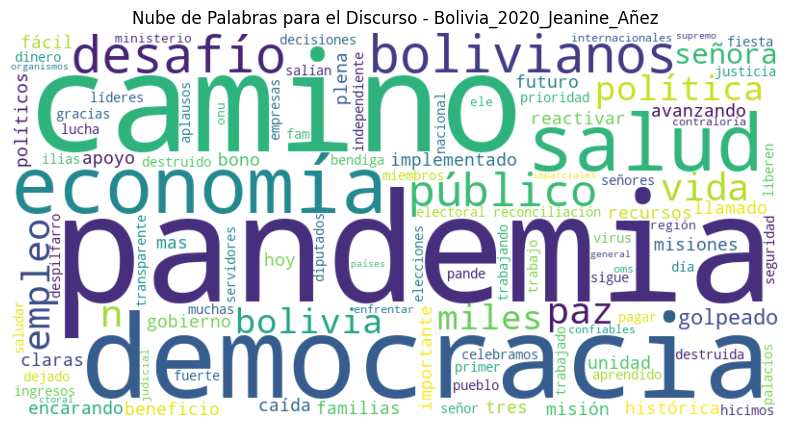

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import ast

# Cargar el DataFrame desde el archivo CSV
ruta_csv = CSV_DIRECTORY_BOW + "\\topic_word_distribution.csv"

df = pd.read_csv(ruta_csv)

# Nombre del discurso configurable
nombre_discurso_configurable = "Bolivia_2020_Jeanine_Añez"
# Puedes cambiar este valor según tus preferencias

# Filtrar el DataFrame para obtener las filas del discurso configurable
df_discurso = df[df["nombre_discurso"] == nombre_discurso_configurable]

# Verificar si hay al menos una palabra
if (
    df_discurso.empty
    or df_discurso["palabras"].empty
    or not df_discurso["palabras"].iloc[0]
):
    print(f"No hay palabras para el discurso {nombre_discurso_configurable}.")
else:  #
    # Obtener todas las palabras del discurso configurable
    palabras_discurso = [
        ast.literal_eval(palabras) for palabras in df_discurso["palabras"]
    ]

    # Unir las palabras de todas las líneas del discurso
    palabras_unidas = [palabra for sublist in palabras_discurso for palabra in sublist]

    # Crear una nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
        " ".join(palabras_unidas)
    )

    # Visualizar la nube de palabrs
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de Palabras para el Discurso - {nombre_discurso_configurable}")
    plt.show()

In [41]:
# Grafico de Frecuencias

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


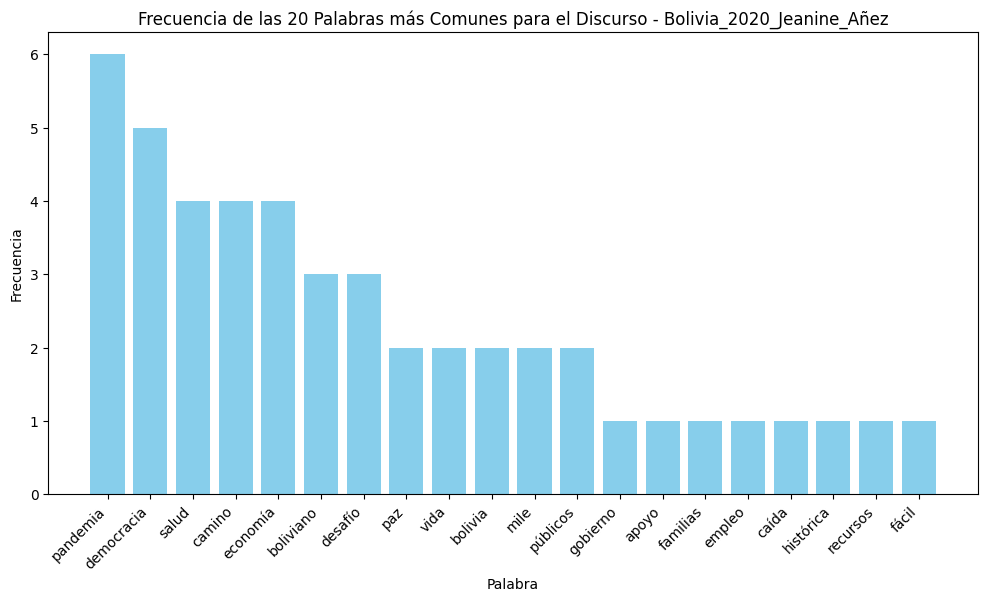

In [16]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Descargar recursos necesarios para NLTK (esto solo se necesita ejecutar una vez)
import nltk

nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

# Cargar el DataFrame desde el archivo CSV

ruta_csv = CSV_DIRECTORY_BOW + "\\topic_word_distribution.csv"
df = pd.read_csv(ruta_csv)

# Nombre del discurso configurable
# Bolivia_2020_Jeanine_Añez    SIN .PDF
nombre_discurso_configurable = "Bolivia_2020_Jeanine_Añez"

# Filtrar el DataFrame para obtener las filas del discurso configurable
df_discurso = df[df["nombre_discurso"] == nombre_discurso_configurable]

# Verificar si hay al menos una palabra
if (
    df_discurso.empty
    or df_discurso["palabras"].empty
    or not df_discurso["palabras"].iloc[0]
):
    print(f"No hay palabras para el discurso {nombre_discurso_configurable}.")
else:
    # Obtener todas las palabras del discurso configurable
    palabras_discurso = [
        ast.literal_eval(palabras) for palabras in df_discurso["palabras"]
    ]

    # Unir las palabras de todas las líneas del discurso
    palabras_unidas = [palabra for sublist in palabras_discurso for palabra in sublist]

    # Lematizar las palabras
    lemmatizer = WordNetLemmatizer()
    palabras_lematizadas = [
        lemmatizer.lemmatize(palabra) for palabra in palabras_unidas
    ]

    # Excluir palabras específicas del conteo

    palabras_excluir = [
        "p",
        "millones",
        "soles",
        "n",
        "g",
        "69",
        "a",
        "e",
        "s",
        "S",
        "sol",
        "así",
        "ser",
        "debe",
        "año",
        "i",
        "o",
        "u",
        "la",
        "los",
        "de",
    ]
    palabras_filtradas = [
        palabra
        for palabra in palabras_lematizadas
        if palabra.lower() not in palabras_excluir
    ]

    # Crear un DataFrame de frecuencias de palabras
    frecuencias = pd.Series(palabras_filtradas).value_counts().reset_index()
    frecuencias.columns = ["Palabra", "Frecuencia"]

    # Ordenar el DataFrame por frecuencia descendente
    frecuencias = frecuencias.sort_values(by="Frecuencia", ascending=False)

    # Configuración del número de palabras a mostrar (editable)
    numero_palabras_a_mostrar = 20  # Puedes cambiar este valor según tus preferencias

    # Filtrar las primeras N palabras
    frecuencias = frecuencias.head(numero_palabras_a_mostrar)

    # Visualizar el gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(frecuencias["Palabra"], frecuencias["Frecuencia"], color="skyblue")
    plt.xlabel("Palabra")
    plt.ylabel("Frecuencia")
    plt.title(
        f"Frecuencia de las {numero_palabras_a_mostrar} Palabras más Comunes para el Discurso - {nombre_discurso_configurable}"
    )
    plt.xticks(rotation=45, ha="right")
    plt.show()